<a href="https://colab.research.google.com/github/magda-moreno/something/blob/main/Lab7_Retailer_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [3]:
df = pd.read_csv (r'/content/gdrive/MyDrive/IS 4487/superstore_retail_orders.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [5]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [6]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [7]:
#data preparation

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55445 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          55445 non-null  int64         
 1   order_date        55445 non-null  datetime64[ns]
 2   order_year_month  55445 non-null  object        
 3   customer_name     55445 non-null  object        
 4   city              55445 non-null  object        
 5   state_province    55445 non-null  object        
 6   quantity          55445 non-null  float64       
 7   product_name      55445 non-null  object        
 8   product_line      55445 non-null  object        
 9   product_price     55445 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.7+ MB


In [10]:
#outlier check and cleanup

In [11]:
df = df[df.product_price != 235481]
values = [100000, 2000, 600, 500, 200, 100, 20]
df = df[df.quantity.isin(values) == False ]
df.describe()

,order_id,quantity,product_price
count,54112.000000,54112.000000,54112.000000
mean,61650.749427,1.490076,614.025482
std,7517.945304,0.610121,816.520407
min,45079.000000,1.000000,2.290000
25%,55641.000000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68068.250000,2.000000,914.620000
max,74147.000000,5.000000,3578.270000


In [12]:
df = df[(df['product_price'] < 1500)]
df.describe()

,order_id,quantity,product_price
count,45614.000000,45614.000000,45614.000000
mean,62443.792147,1.581379,302.674605
std,6878.515870,0.623311,357.024693
min,45080.000000,1.000000,2.290000
25%,56576.000000,1.000000,4.990000
50%,62451.500000,2.000000,53.990000
75%,68339.000000,2.000000,609.630000
max,74147.000000,5.000000,1199.000000


In [13]:
#impute values

In [14]:
if df['product_price'].isnull().any():
    df['product_price'].fillna(df['product_price'].median(), inplace=True)

In [15]:
#Add a "total_amount" variable based on the quantity and price

In [16]:
df['total_amount'] = (df['product_price']* df['quantity']).round(2)
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99


In [17]:
df.describe()

,order_id,quantity,product_price,total_amount
count,45614.000000,45614.000000,45614.000000,45614.000000
mean,62443.792147,1.581379,302.674605,387.317762
std,6878.515870,0.623311,357.024693,502.614801
min,45080.000000,1.000000,2.290000,2.290000
25%,56576.000000,1.000000,4.990000,9.980000
50%,62451.500000,2.000000,53.990000,53.990000
75%,68339.000000,2.000000,609.630000,630.090000
max,74147.000000,5.000000,1199.000000,3249.950000


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [18]:
values = list(df.values.tolist())

# Assign 1 if all fields are valid, otherwise 2
df['complete_customer_info']= '1' if '' not in values[:] else '2'


In [19]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount,complete_customer_info
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97,1
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96,1
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95,1
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1


In [20]:
#create chart

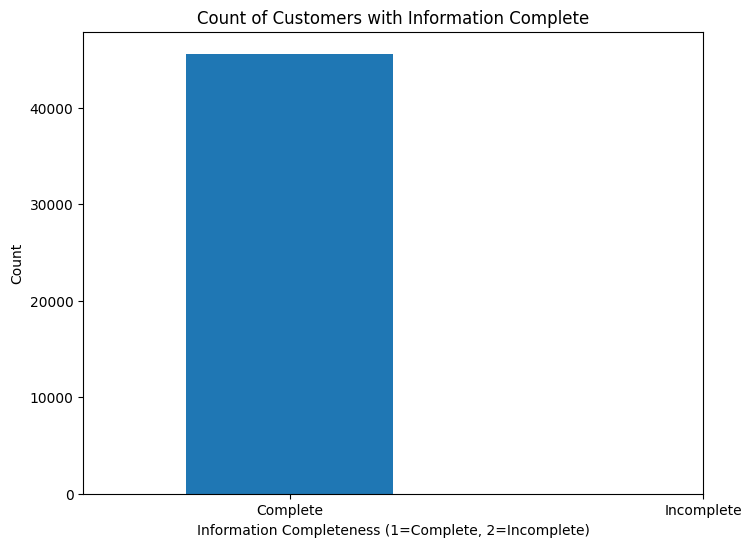

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['complete_customer_info'].value_counts().plot(kind='bar')
plt.title('Count of Customers with Information Complete')
plt.xlabel('Information Completeness (1=Complete, 2=Incomplete)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Complete', 'Incomplete'], rotation=0)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [22]:
#seasonality

In [23]:
df['season'] = df['order_date'].dt.month % 12 // 3 + 1

seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(seasons)


In [24]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount,complete_customer_info,season
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97,1,Summer
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96,1,Summer
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95,1,Summer
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer


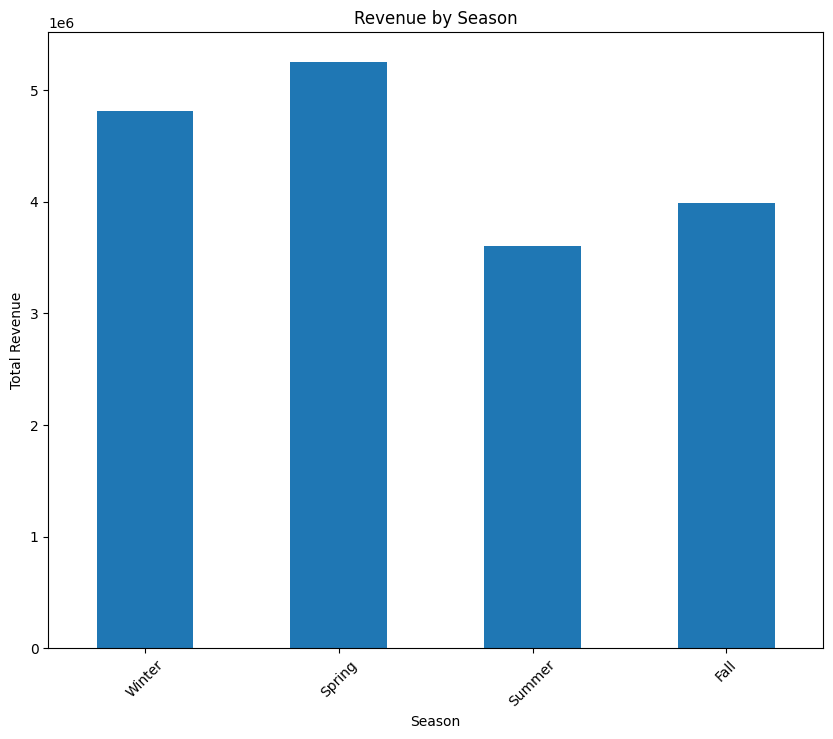

In [25]:
seasonal_revenue = df.groupby('season')['total_amount'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
plt.figure(figsize=(10, 8))
seasonal_revenue.plot(kind='bar')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [26]:
#revenue over time

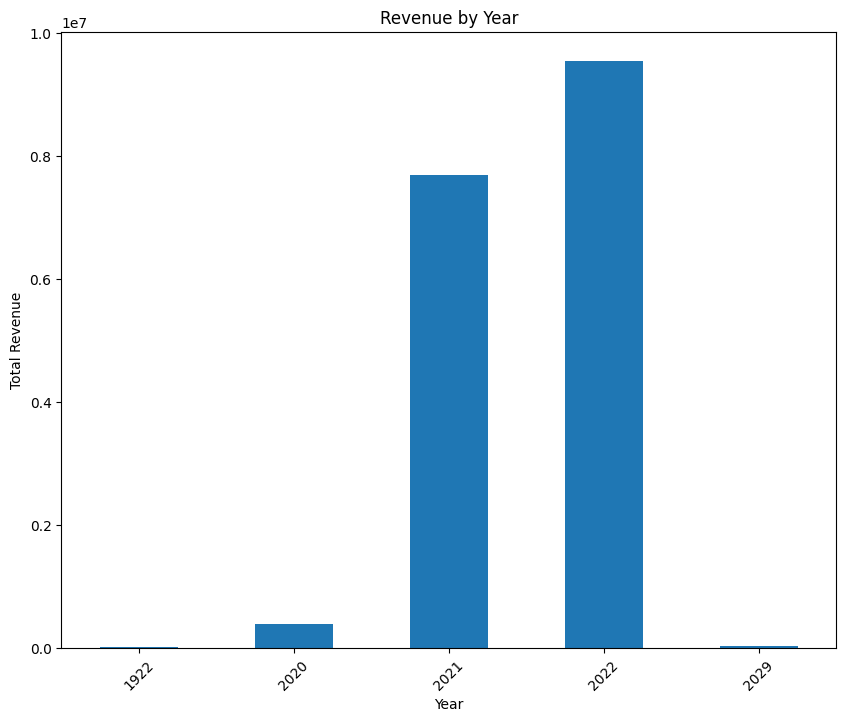

In [27]:
df['year'] = pd.DatetimeIndex(df['order_date']).year
yearly_revenue = df.groupby('year')['total_amount'].sum()
plt.figure(figsize=(10, 8))
yearly_revenue.plot(kind='bar')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [28]:
#indoor/outdoor variable

In [29]:
df['product_line'].unique()

array(['Mobile', 'Bikes', 'Cameras', 'Electronics', 'Accessories',
       'Clothing', 'OfficeProducts'], dtype=object)

In [30]:
df['product_name'].unique()

array(['Apple iPhone XR (Yellow, 256 GB) (Includes EarPods, Power Adapter)',
       'Road-750 Black, 52', 'Road-750 Black, 48', 'Road-750 Black, 44',
       'Mountain-500 Black, 52', 'Mountain-500 Black, 48',
       'Mountain-500 Black, 44', 'Mountain-500 Black, 42',
       'Mountain-500 Black, 40', 'DJI Osmo Pocket 3',
       'Mountain-500 Silver, 44', 'Mountain-500 Silver, 42',
       'Mountain-500 Silver, 40', 'Mountain-400-W Silver, 46',
       'Mountain-400-W Silver, 42', 'Mountain-400-W Silver, 40',
       'Mountain-400-W Silver, 38', 'Touring-3000 Blue, 50',
       'Touring-3000 Blue, 44', 'Road-750 Black, 58',
       'APPLE iPhone 15 Pro Max (Purple, 256 GB)',
       'APPLE iPhone 15 Pro Max (Blue, 256 GB)',
       'APPLE iPhone 15 Pro (Yellow, 256 GB)', 'Touring-3000 Yellow, 62',
       'Touring-3000 Yellow, 58', 'Touring-3000 Yellow, 54',
       'Touring-3000 Yellow, 50', 'Touring-3000 Yellow, 44',
       'Touring-3000 Blue, 62', 'Touring-3000 Blue, 58',
       'Touring-3000 

In [31]:
grouped_data = df.groupby(['product_line', 'product_name']).size().reset_index(name='count')
grouped_data

,product_line,product_name,count
0,Accessories,All-Purpose Bike Stand,234
1,Accessories,Bike Wash - Dissolver,845
2,Accessories,E-COSMOS 5V 1.2W Portable Flexible USB LED Light,2925
3,Accessories,GIZGA essentials Universal Silicone Keyboard P...,2835
4,Accessories,Hitch Rack - 4-Bike,301
...,...,...,...
83,Mobile,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",40
84,Mobile,"SAMSUNG Galaxy S23 Plus 5G (Cream, 256 GB)",291
85,Mobile,"SAMSUNG Galaxy S23 Plus 5G (Phantom Black, 256...",279
86,Mobile,"SAMSUNG Galaxy Z Flip4 5G (Graphite, 256 GB)",253


In [32]:
# Define the outdoor products
outdoor_products = ['Garden', 'Outdoor','Bikes', 'Bike', 'Pack', 'Road', 'Tire', 'Water Bottle', 'Mountain', 'Racing' ]

# Apply categorization directly without using a separate function
df['product_category'] = df.apply(lambda row: 'Outdoor' if any(product in row['product_line'] or product in row['product_name'] for product in outdoor_products) else 'Indoor', axis=1)


In [33]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount,complete_customer_info,season,year,product_category
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97,1,Summer,2021,Indoor
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96,1,Summer,2021,Indoor
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95,1,Summer,2021,Indoor
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer,2021,Indoor
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer,2021,Indoor


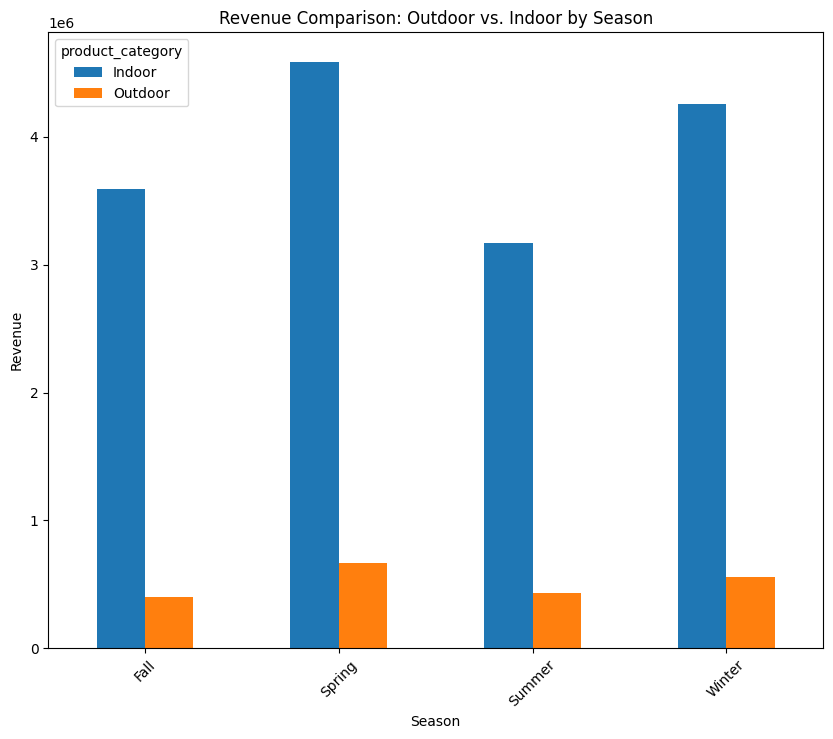

In [34]:
pivot_table = df.pivot_table(values='total_amount', index='season', columns='product_category', aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(10, 8))
plt.title('Revenue Comparison: Outdoor vs. Indoor by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()